# Length distributions equalization

Create datasets with equal numbers of good and bad jokes. Also distributions of jokes length (number of words) forsed to be the same. So there should be no direct dependence on joke length.

In [1]:
import json

an_bad = []
for i in range(3):
    f = open("D:\\AH3\\data\\processed\\an_bad{}.json".format(i+1), "r", encoding = "utf-8")
    an_bad += json.loads(f.read())
f = open("D:\\AH3\\data\\processed\\an_good.json", "r", encoding = "utf-8")
an_good = json.loads(f.read())
f = open("D:\\AH3\\data\\processed\\bash_bad.json", "r", encoding = "utf-8")
bash_bad = json.loads(f.read())
f = open("D:\\AH3\\data\\processed\\bash_good.json", "r", encoding = "utf-8")
bash_good = json.loads(f.read())

Good jokes tend to be longer. One can see it from average lengths and histogramms:

Average length
    good anecdotes:   33.53
    bad anecdotes:    27.00
    good bash quotes: 46.36
    bad bash quotes:  33.26


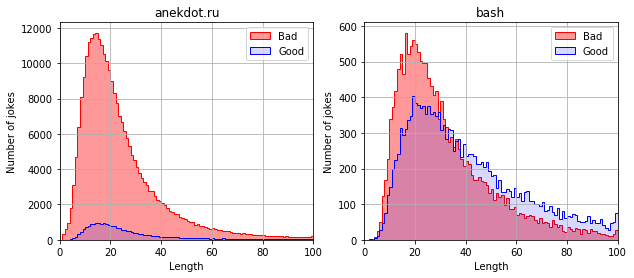

In [2]:
import numpy as np
import matplotlib.pyplot as plt

an_good_lengths   = np.array([len(a[0].split()) for a in an_good])
an_bad_lengths    = np.array([len(a[0].split()) for a in an_bad])
bash_good_lengths = np.array([len(b[0].split()) for b in bash_good])
bash_bad_lengths  = np.array([len(b[0].split()) for b in bash_bad])

def ShowLengthsHistogramm(good_lengths, bad_lengths, label = ""):
    n,bins,patches = plt.hist(bad_lengths, bins = 100, range = (0,100), histtype = 'stepfilled',
                              color = (1,0,0,0.4), edgecolor = 'r');
    n,bins,patches = plt.hist(good_lengths, bins = 100, range = (0,100), histtype = 'stepfilled', 
                              color = (0,0,1,0.15), edgecolor = 'b');
    plt.grid()
    plt.xlim((0, 100))
    #plt.ylim((0, 12000))
    plt.xlabel('Length')
    plt.ylabel('Number of jokes')
    plt.legend(['Bad', 'Good'])
    plt.title(label)

# Histogramms before equalization
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ShowLengthsHistogramm(an_good_lengths, an_bad_lengths, "anekdot.ru")
plt.subplot(1,2,2)
ShowLengthsHistogramm(bash_good_lengths, bash_bad_lengths, "bash")

print("""Average length\n    good anecdotes:   {:.2f}\n    bad anecdotes:    {:.2f}
    good bash quotes: {:.2f}\n    bad bash quotes:  {:.2f}""".format(
    np.mean(an_good_lengths), np.mean(an_bad_lengths), 
    np.mean(bash_good_lengths), np.mean(bash_bad_lengths)))


Let's create datasets with equal lengths distributions for good and bad jokes. We sort jokes according lengths, then divide sorted arrays into 50 parts and randomly choose equal number of jokes in each part.

In [3]:
def SameLength(x, y):
    """Remove elements from longer array so both arrays have the same length"""
    n_min = min(len(x), len(y))
    rnd = np.arange(n_min)
    np.random.shuffle(rnd)
    if len(x) < len(y):
        y = [y[k] for k in rnd[:n_min]]
    else:
        x = [x[k] for k in rnd[:n_min]]
    return x, y
        

def EqualizeLengths(good, bad, num_of_parts = 50):
    N = len(good) + len(bad)
    N_good = len(good)
    all_jokes = good + bad
    lengths = np.array([len(a[0].split()) for a in all_jokes])
    idx = lengths.argsort()
    # is_good shows if joke is good in sorted array
    is_good = np.zeros(N, dtype = np.int)
    is_good[:N_good] = 1
    is_good = is_good[idx]
    
    good_eq = []
    bad_eq = []
    for i in range(num_of_parts):
        p_beg = int(i * N / num_of_parts)
        p_end = min(int(p_beg + N / num_of_parts), N)
        p_good = [all_jokes[k] for k in range(p_beg, p_end) if is_good[k]]
        p_bad  = [all_jokes[k] for k in range(p_beg, p_end) if not is_good[k]]
        p_good, p_bad = SameLength(p_good, p_bad)
        good_eq += p_good
        bad_eq += p_bad    
    
    return good_eq, bad_eq
    

an_good_eq, an_bad_eq = EqualizeLengths(an_good, an_bad)
bash_good_eq, bash_bad_eq = EqualizeLengths(bash_good, bash_bad)

Average length
    good anecdotes:   28.03
    bad anecdotes:    28.40
    good bash quotes: 39.61
    bad bash quotes:  40.12

 24137 24137 14154 14154


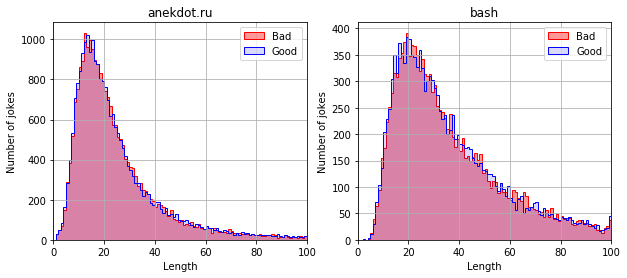

In [4]:
# Histogramms after equalization
an_good_lengths   = np.array([len(a[0].split()) for a in an_good_eq])
an_bad_lengths    = np.array([len(a[0].split()) for a in an_bad_eq])
bash_good_lengths = np.array([len(b[0].split()) for b in bash_good_eq])
bash_bad_lengths  = np.array([len(b[0].split()) for b in bash_bad_eq])

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ShowLengthsHistogramm(an_good_lengths, an_bad_lengths, "anekdot.ru")
plt.subplot(1,2,2)
ShowLengthsHistogramm(bash_good_lengths, bash_bad_lengths, "bash")

print("""Average length\n    good anecdotes:   {:.2f}\n    bad anecdotes:    {:.2f}
    good bash quotes: {:.2f}\n    bad bash quotes:  {:.2f}""".format(
    np.mean(an_good_lengths), np.mean(an_bad_lengths), 
    np.mean(bash_good_lengths), np.mean(bash_bad_lengths)))

print("\n", len(an_good_eq), len(an_bad_eq), len(bash_good_eq), len(bash_bad_eq))



In [5]:
f = open('D:\\AH3\\data\\processed\\an_good_eq.json', 'w', encoding = 'utf-8')
f.write(json.dumps(an_good_eq, ensure_ascii = False))
f.close()
f = open('D:\\AH3\\data\\processed\\an_bad_eq.json', 'w', encoding = 'utf-8')
f.write(json.dumps(an_bad_eq, ensure_ascii = False))
f.close()
f = open('D:\\AH3\\data\\processed\\bash_good_eq.json', 'w', encoding = 'utf-8')
f.write(json.dumps(bash_good_eq, ensure_ascii = False))
f.close()
f = open('D:\\AH3\\data\\processed\\bash_bad_eq.json', 'w', encoding = 'utf-8')
f.write(json.dumps(bash_bad_eq, ensure_ascii = False))
f.close()

array([2, 3])